# HOUSE SALES PREDICTION IN KING COUNTY USING 

Project Overview

### Requirements

### The Data

## Data Preparation

#### Cleaning and Processing of Data

In [1]:
# Impport liriaries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_csv("//home/sarah/Phase2 project/KC-king-county-Analysis/Phase2 Data/kc_house_data.csv")


In [3]:
#view the first five entries
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# view information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Checking for missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
# View for Statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Waterfront Column

In [7]:
#check the summary statistcs of waterfront
df["waterfront"].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [8]:
#calculate the median 
waterfront_median = df["waterfront"].median()
waterfront_median

0.0

In [9]:
#fill the null values in the waterfrontcolumn with the median
df["waterfront"].fillna(waterfront_median, inplace = True)

In [10]:
# check if the replaced values have been actualized
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
#check the value count of each element in the column
df["waterfront"].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

### Price column

In [12]:
#Check the highest price for the house
df.sort_values("price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,0.0,...,5,780,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0.0,0.0,...,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0.0,0.0,...,5,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,...,6,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,...,5,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449


In [13]:
#sort the dataframe according to price in descending order
df.sort_values("price", ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750


### Bedrooms Column

In [14]:
df.sort_values("bedrooms")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9877,1231000310,8/12/2014,713000.0,1,1.00,1180,4000,1.5,0.0,2.0,...,8,840,340.0,1910,0.0,98118,47.5561,-122.266,1420,4000
9536,2658000115,6/18/2014,190000.0,1,1.00,720,4800,1.0,0.0,0.0,...,6,720,0.0,1914,0.0,98118,47.5303,-122.270,1240,4860
14332,1523300180,7/9/2014,321500.0,1,1.00,730,1942,1.0,0.0,0.0,...,7,730,0.0,2008,0.0,98144,47.5939,-122.299,1020,2183
14340,2009003136,8/22/2014,325000.0,1,1.00,1220,12426,1.0,0.0,4.0,...,6,1220,0.0,1946,NaN,98198,47.4047,-122.331,2770,22270
12823,1154100205,10/13/2014,305000.0,1,1.00,900,7500,1.0,0.0,0.0,...,5,900,0.0,1946,NaN,98155,47.7553,-122.283,1470,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960


In [15]:
df.sort_values("bedrooms", ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12472,1172000150,8/29/2014,238000.0,1,1.00,530,6350,1.0,0.0,0.0,...,5,530,0.0,1941,0.0,98103,47.6946,-122.357,1200,6350
13316,4356200120,10/23/2014,248000.0,1,1.00,790,12000,1.0,0.0,0.0,...,6,790,0.0,1918,0.0,98118,47.5146,-122.265,1900,6000
7010,203100460,9/24/2014,400000.0,1,1.00,530,13679,1.0,0.0,0.0,...,6,530,0.0,1949,0.0,98053,47.6422,-121.954,1930,20624
3578,1925069006,12/3/2014,355000.0,1,0.75,530,33278,1.0,0.0,2.0,...,4,530,0.0,1950,0.0,98074,47.6412,-122.079,2830,14311


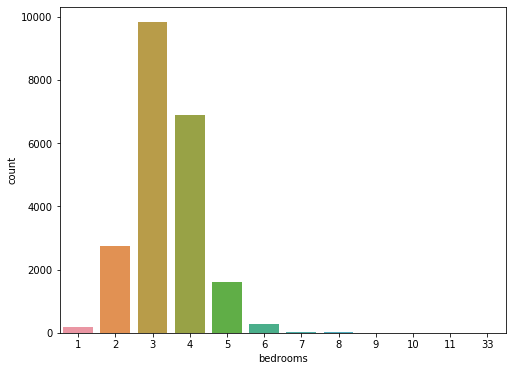

In [16]:
# Draw a plot of bedrooms and count.
plt.figure(figsize=(8,6))
sns.countplot(x = df['bedrooms'])

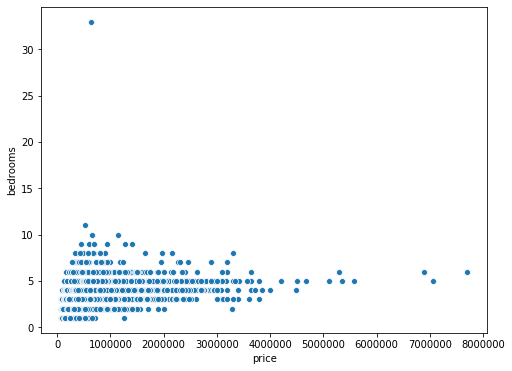

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data= df, x=df['price'], y=df['bedrooms'])

In [18]:
# Drop the outliers in the data

df = df[(df.bedrooms != 33)]

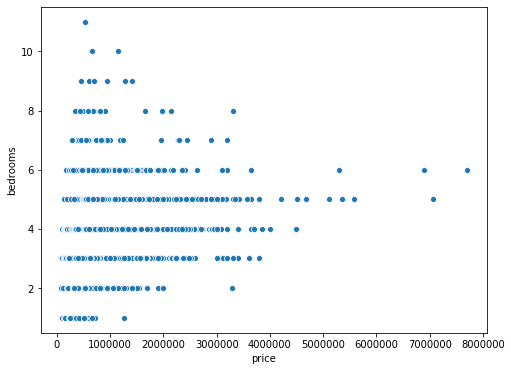

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data= df, x=df['price'], y=df['bedrooms'])

### Sqft_Basement

In [20]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [21]:
#Dropping "?"
df = df[df.sqft_basement != "?"]

In [22]:
#convert the data type from string to float
df["sqft_basement"]= df["sqft_basement"].astype("float")

In [23]:
df["zipcode"]=df["zipcode"].astype("float")

In [24]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### YR- Renovated

In [25]:
# Summary statistics of the column
df["yr_renovated"].describe()

count    17388.000000
mean        82.996722
std        398.492781
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [26]:
yr_renovated = df["yr_renovated"].median()
yr_renovated

0.0

In [27]:
#Replace the NAN values with the value of median "0"
df["yr_renovated"].fillna("yr_renovated_median", inplace = True)

In [28]:
#Check the highest price for the house
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             61
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

### View

In [29]:
#check the summary statistcs of waterfront
df["view"].describe()

count    21081.000000
mean         0.233338
std          0.765083
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [30]:
#calculate the median 
view_median = df["view"].median()
view_median

0.0

In [31]:
#We fill the missing values with median 
df["view"].fillna(view_median, inplace = True)

In [32]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Data manupulation

In [33]:
# show the relationship between categorical features with the target 
corr_matrix = df.corr()[[ 'price']].sort_values('price')
corr_matrix

,price
zipcode,-0.053173
id,-0.015786
long,0.022112
condition,0.035264
yr_built,0.054471
sqft_lot15,0.083196
sqft_lot,0.087940
floors,0.256372
waterfront,0.265970
lat,0.306502


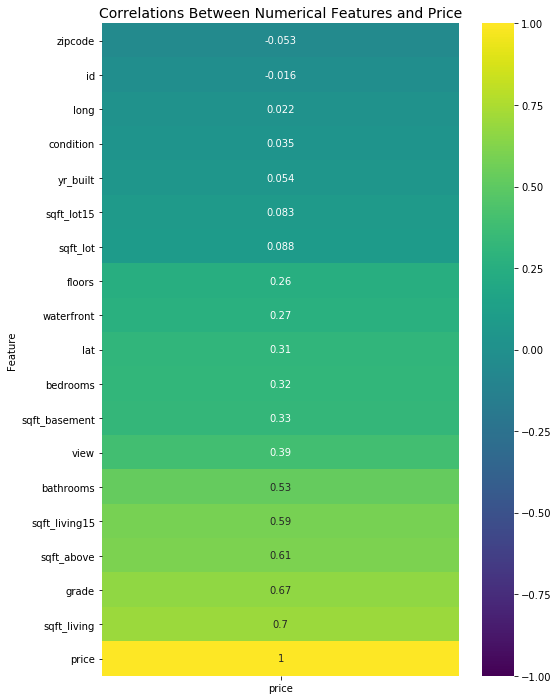

In [34]:
#Heat map to show correlation of numerical features with price
plt.figure(figsize=(8, 12))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Numerical Features and Price', fontdict={'fontsize':14})
plt.ylabel('Feature');

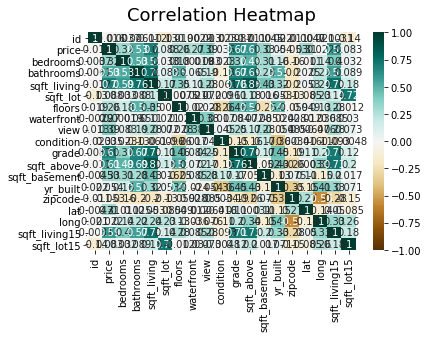

In [35]:
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be croppedplt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

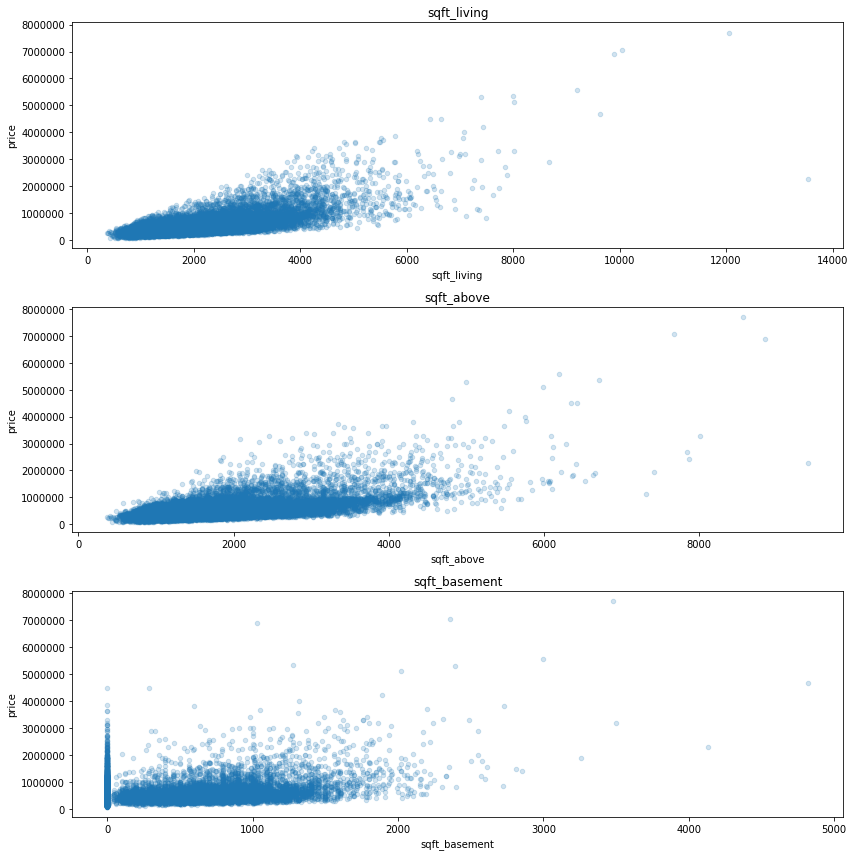

In [36]:
# Let's visualize our continuous variables to see relationship to sale price for exploratory purposes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,12))

for xcol, ax in zip(['sqft_living', 'sqft_above', 'sqft_basement'], axes):
    df.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax, alpha=0.2)
    
    ax.set_title(xcol)               
    
fig.tight_layout()

In [37]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


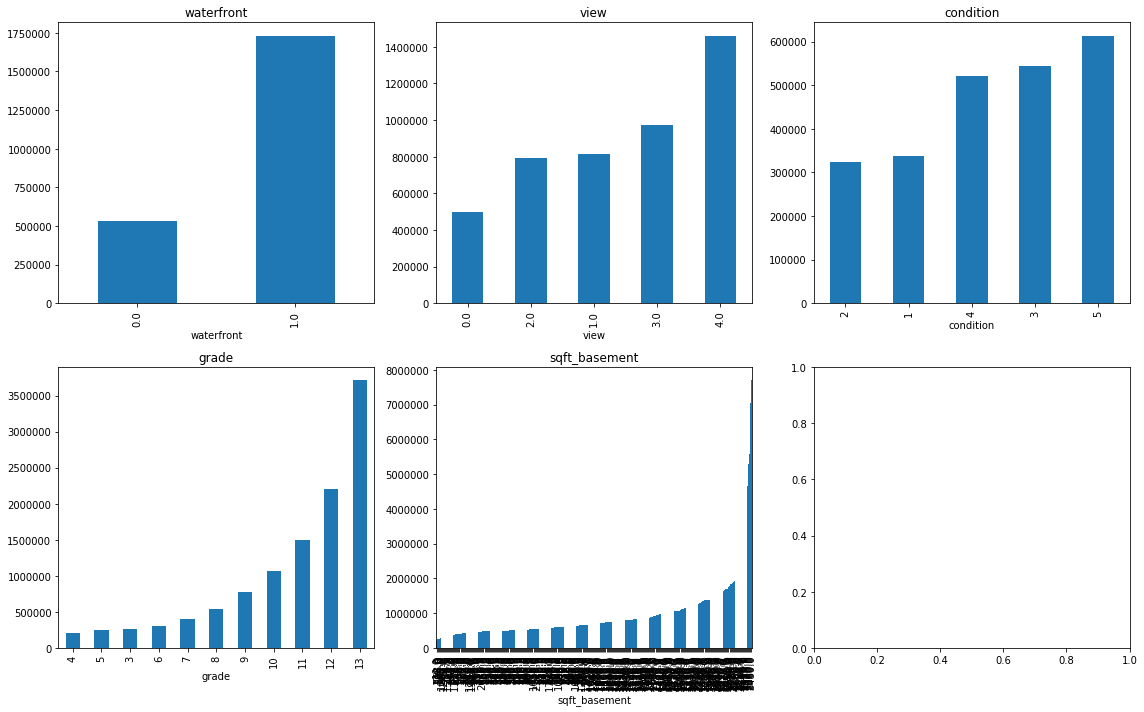

In [38]:
#visualize our categorical variables to see relationship to price for exploratory purposes

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16,10))

categoricals = ['waterfront', 'view', 'condition', 'grade', 'sqft_basement']
# group values together by column of interest
# sort the groups in ascending order
# create a bar graph on the ax
# Make the title the name of the column
for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)
        .mean()['price']  
        .sort_values()             
        .plot
        .bar(ax = ax))                
    
    ax.set_title(col)               
    
fig.tight_layout()

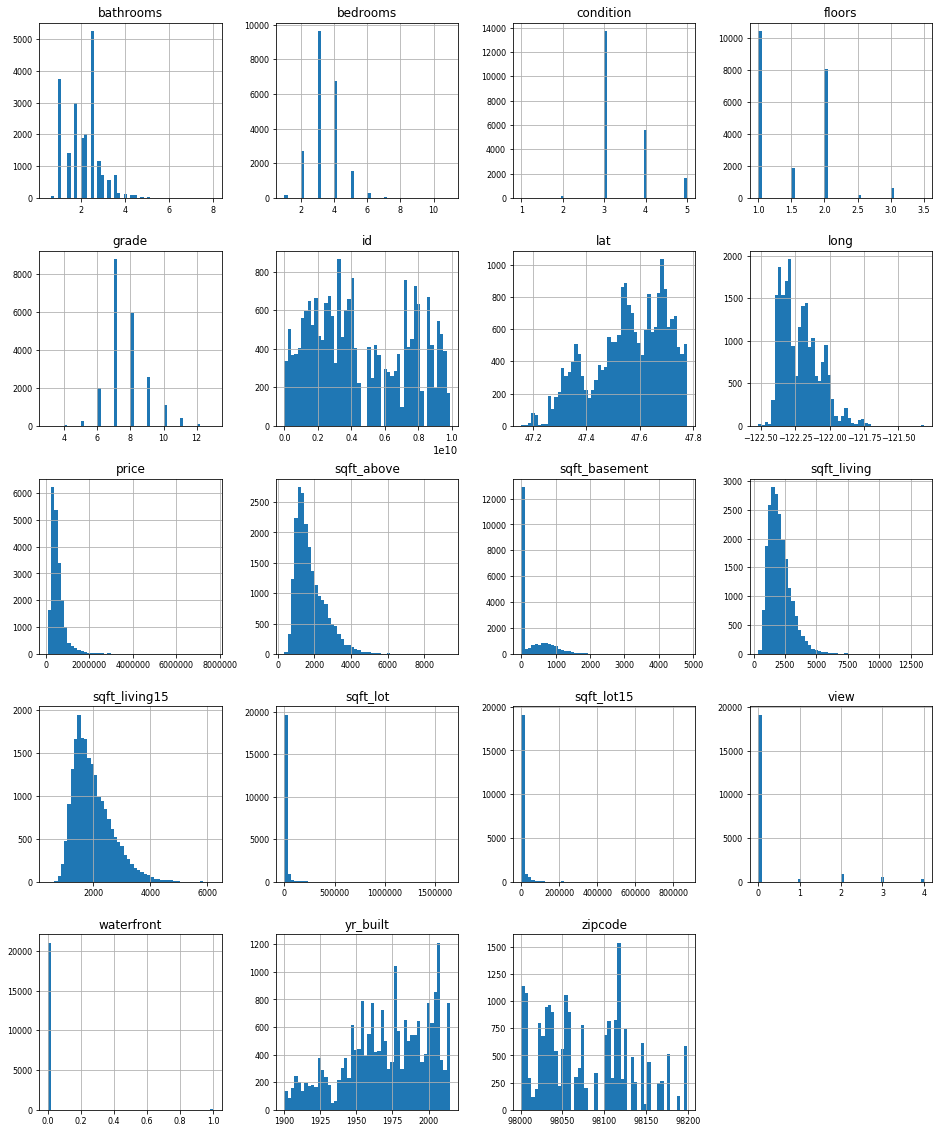

In [39]:
df[df.select_dtypes(exclude = object).columns].hist(figsize=(16, 20),
                                                        bins = 50, xlabelsize = 8, ylabelsize = 8);

In [40]:
#Removing outliers in the Price COlumn
df = df.query('price < price.quantile(.95)')

 ### Multicollinearity

In [41]:
#peasons correlation coefficients
df.corr().head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.007375,0.011182,0.022313,0.005209,-0.133160,0.029332,0.000632,0.020177,-0.025022,0.029775,0.007831,-0.004064,0.025402,-0.008695,-0.000697,0.022179,0.009860,-0.142193
price,0.007375,1.000000,0.305072,0.459858,0.627587,0.097389,0.273207,0.051435,0.238714,0.034788,0.635632,0.535105,0.239800,0.063499,-0.021144,0.428106,0.074905,0.568309,0.085413
bedrooms,0.011182,0.305072,1.000000,0.507036,0.601568,0.028062,0.163661,-0.026866,0.041753,0.018780,0.332566,0.478806,0.290780,0.169889,-0.152644,-0.029894,0.145570,0.383320,0.024402
bathrooms,0.022313,0.459858,0.507036,1.000000,0.717853,0.068260,0.503926,-0.007760,0.097229,-0.139649,0.617366,0.640125,0.224189,0.545677,-0.207394,-0.006154,0.249414,0.532019,0.067994
sqft_living,0.005209,0.627587,0.601568,0.717853,1.000000,0.163630,0.341123,0.000333,0.169549,-0.076615,0.709158,0.855087,0.377727,0.355447,-0.204170,0.014772,0.287409,0.739892,0.176077


In [42]:
mask =np.zeros_like(df.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True

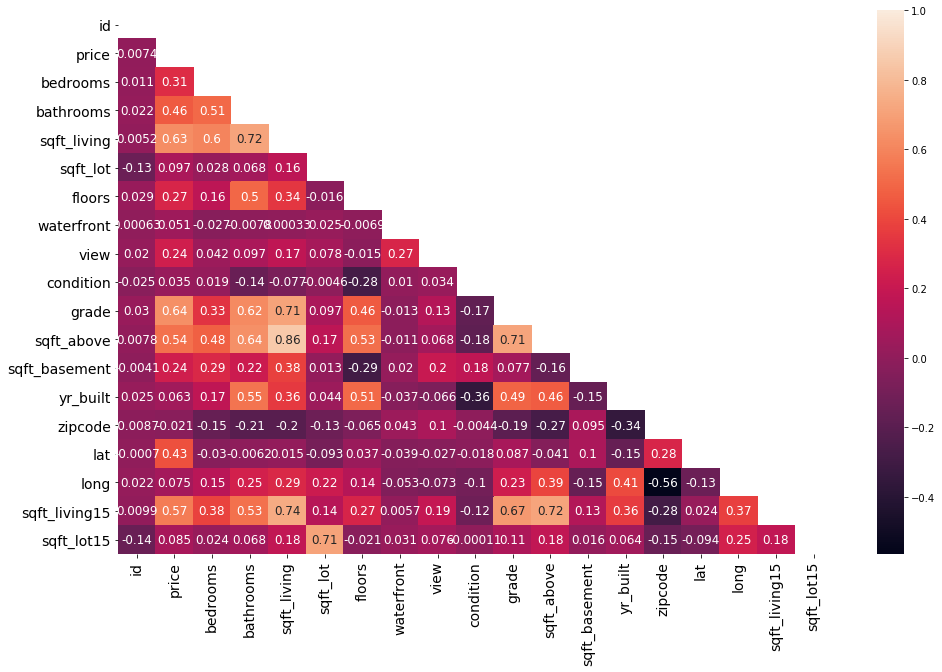

In [43]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size":12})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

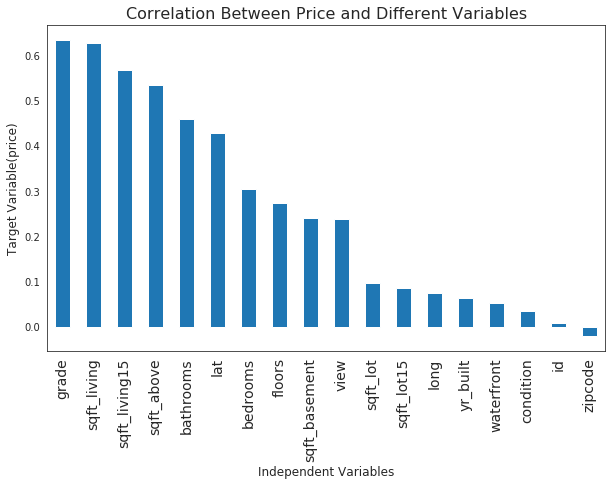

In [44]:
#Plot the Correlation table Between Price and Different Variables
ax=df.corr()['price'].sort_values(ascending=False).drop('price').plot(kind='bar',figsize=(10,6))

# Set title
ax.set_title("Correlation Between Price and Different Variables",fontdict={'fontsize':16})

# Set labels for X and Y axes
ax.set_xlabel("Independent Variables",fontdict={'fontsize':12})
ax.set_ylabel("Target Variable(price)",fontdict={'fontsize':12})

ax.set_xticklabels(ax.get_xticklabels(),fontsize=14);

#### LINEAR REGRESSION MODELLING

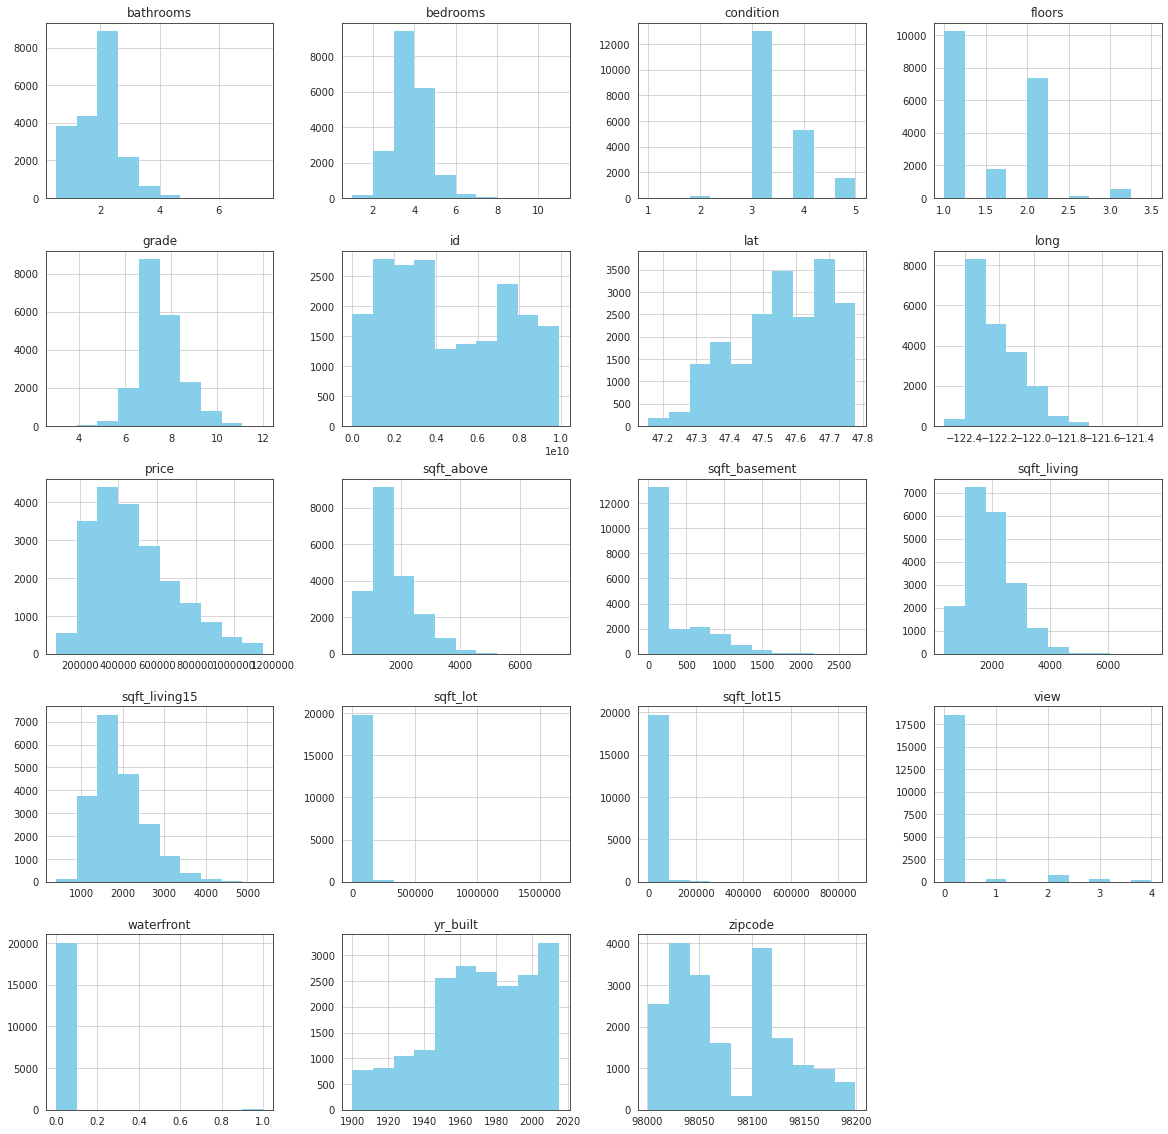

In [45]:
 #this function gives us histograms for each column
df.hist(figsize = (20,20), color = "skyblue", lw=0);

#### Model 1

In [46]:
#creating and label features
x = df.drop(columns=["price",'bedrooms','bathrooms','sqft_lot'])


In [47]:
x

,id,date,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,1180,1.0,0.0,0.0,3,7,1180,0.0,1955,0,98178.0,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,2570,2.0,0.0,0.0,3,7,2170,400.0,1951,1991,98125.0,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,770,1.0,0.0,0.0,3,6,770,0.0,1933,yr_renovated_median,98028.0,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,1960,1.0,0.0,0.0,5,7,1050,910.0,1965,0,98136.0,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,1680,1.0,0.0,0.0,3,8,1680,0.0,1987,0,98074.0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,1530,3.0,0.0,0.0,3,8,1530,0.0,2009,0,98103.0,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,2310,2.0,0.0,0.0,3,8,2310,0.0,2014,0,98146.0,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,1020,2.0,0.0,0.0,3,7,1020,0.0,2009,0,98144.0,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,1600,2.0,0.0,0.0,3,8,1600,0.0,2004,0,98027.0,47.5345,-122.069,1410,1287


In [48]:
# Define the y variable
y = df["price"]
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [49]:
# split the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1)

In [50]:
print(f"X_train is a DataFrame with {x_train.shape[0]} rows and {x_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert x_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 15057 rows and 17 columns
y_train is a Series with 15057 values


In [51]:
# normalizing the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

ValueError: could not convert string to float: '12/2/2014'